In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


In [2]:
df = pd.read_csv('Dataset/train.csv')
def prepare_data(df):
    no_sig = ['id','name','orbiting_body','sentry_object']  # Unsignificant feature
    sig = [col for col in df.columns if col not in no_sig]  # Significant feature
    data = df[sig] # Data with significant feature
    data_updated = pd.get_dummies(data,columns=['hazardous'],drop_first=True).rename(columns = {'hazardous_True':'hazardous'})
    return data_updated


data = prepare_data(df)
feature = data.drop('hazardous',axis = 1) # Independent Variable
target = data.hazardous # Dependent Variable


In [4]:
data.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,0
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,1
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,0
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,0
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,1


In [5]:
# Train-Test splitting
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.3,stratify=target)

In [6]:
len(x_train),len(y_train),len(x_test),len(y_test)  # Checking size

(63585, 63585, 27251, 27251)

In [7]:
# Since we have no null values we can simple replace null values with mean to make distribution normal
# We can also impute value with mean,median or
# using iterative imputer from sklearn 
impute = SimpleImputer(missing_values=np.nan,strategy='mean')

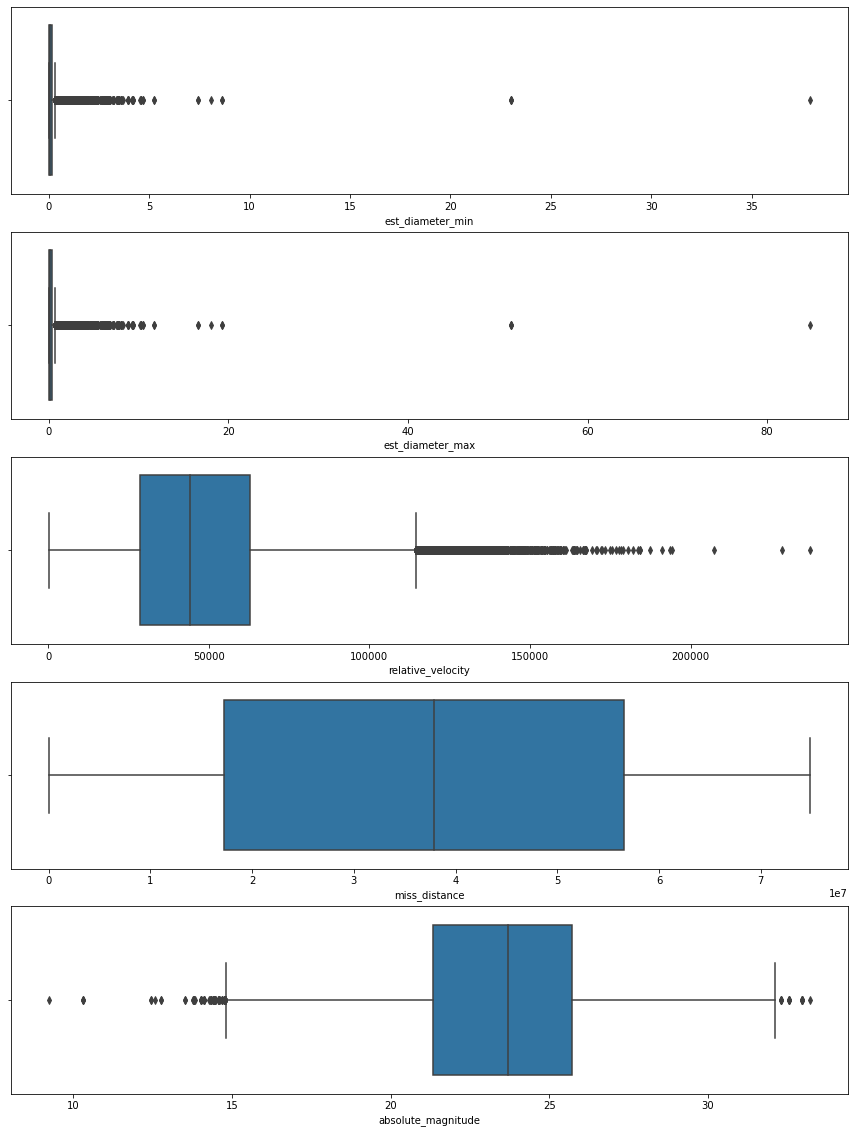

In [8]:
# Now check for outliers
plt.figure(figsize=(15,20))
j=1
for i in x_train.columns:
    plt.subplot(5,1,j)
    sns.boxplot(x=i,hue='hazardous',data = data)
    j+=1
    
# There is so much outliers so there is a confusion should we remove it or not ?

In [ ]:
# As everything is numerical now, we don't need to encode feature
# Therefore removing null values done using imputer, target column is encoded

In [13]:
# Now use different models for prediction

In [14]:
# x_train.to_csv('x_train.csv')
# y_train.to_csv('y_train.csv')
# x_test.to_csv('x_test.csv')
# y_test.to_csv('y_test.csv')